### Variate Autoregression Model

In [1]:

import pandas as pd
from statsmodels.tsa.api import VAR
import os
from dotenv import load_dotenv
import yfinance as yf
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
# Load environment variables from the .env file
load_dotenv('../.env');

# Data Viz. 
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.ndimage import gaussian_filter
from calendar import monthrange
from calendar import month_name
from calendar import monthrange, month_name
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': 'white', 'grid.color': '.8'}
)
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'
cmaps_hex = ['#193251','#FF5A36','#696969', '#7589A2','#FF5A36', '#DB6668']
sns.set_palette(palette=cmaps_hex)
sns_c = sns.color_palette(palette=cmaps_hex)
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

from sklearn.preprocessing import StandardScaler


import numpy as np

In [2]:
# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_symbols = tickers['Symbol'].tolist()

# And the company name
sp500_names = tickers['Security'].tolist()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create an empty list to store DataFrames for each stock
company_list = []

# Download data for each stock and add a 'company_name' column
for stock, com_name in zip(sp500_symbols, sp500_names):
    df = yf.download(stock, start, end)
    df['company_name'] = com_name
    company_list.append(df)

# Concatenate the list of DataFrames into a single DataFrame
df = pd.concat(company_list, axis=0)

df.tail(100)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******


1 Failed download:
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******


1 Failed download:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-12-18 00:00:00 -> 2023-12-18 13:46:37.281039)')



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

C:\Users\chris\AppData\Local\Temp\ipykernel_29912\3368134996.py:39: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(company_list, axis=0)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-27,192.800003,194.990005,188.479996,188.690002,188.239304,2173400.0,Zoetis
2023-07-28,190.500000,191.279999,187.860001,189.899994,189.446411,1899800.0,Zoetis
2023-07-31,189.179993,190.089996,186.440002,188.089996,187.640732,1500800.0,Zoetis
2023-08-01,187.460007,188.770004,184.789993,185.509995,185.066895,1535300.0,Zoetis
2023-08-02,184.229996,185.869995,181.660004,182.000000,181.565292,2284800.0,Zoetis
...,...,...,...,...,...,...,...
2023-12-11,185.169998,190.149994,184.679993,189.460007,189.460007,3199200.0,Zoetis
2023-12-12,190.080002,192.500000,188.919998,191.470001,191.470001,1899700.0,Zoetis
2023-12-13,191.779999,197.669998,190.940002,197.410004,197.410004,2104700.0,Zoetis


In [3]:
import pandas as pd
df = df.assign(
    timestamp=pd.to_datetime(df.index), 
    date=df.index.date,
    year=df.index.year,
    month=df.index.month,
    day=df.index.day,
    dayofyear=df.index.dayofyear,
)

print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-19  121.330002  123.769997  121.160004  122.129997  115.167542   
2022-12-20  121.989998  122.330002  120.699997  120.809998  113.922791   
2022-12-21  121.830002  123.839996  121.510002  123.459999  116.421722   
2022-12-22  122.220001  122.500000  119.199997  121.589996  114.658325   
2022-12-23  120.790001  121.000000  117.800003  120.139999  113.290993   
...                ...         ...         ...         ...         ...   
2023-12-11  185.169998  190.149994  184.679993  189.460007  189.460007   
2023-12-12  190.080002  192.500000  188.919998  191.470001  191.470001   
2023-12-13  191.779999  197.669998  190.940002  197.410004  197.410004   
2023-12-14  198.000000  201.919998  198.000000  200.089996  200.089996   
2023-12-15  199.410004  199.410004  193.970001  196.289993  196.289993   

               Volume company_name  t

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,timestamp,year,month,day,dayofyear
count,124959.000000,124959.000000,124959.000000,124959.000000,124959.000000,1.249590e+05,124959,124959.000000,124959.000000,124959.000000,124959.000000
mean,178.229705,180.185876,176.374368,178.345756,177.124992,4.826399e+06,2023-06-19 10:16:39.630278656,2022.964060,6.540041,15.851287,183.546259
min,7.710000,7.900000,7.530000,7.670000,7.670000,0.000000e+00,2022-12-19 00:00:00,2022.000000,1.000000,1.000000,3.000000
25%,59.004999,59.650002,58.349998,58.970001,58.182892,9.686000e+05,2023-03-21 00:00:00,2023.000000,4.000000,8.000000,93.000000
50%,106.500000,107.669998,105.339996,106.540001,105.364349,1.968600e+06,2023-06-21 00:00:00,2023.000000,7.000000,16.000000,186.000000
75%,202.000000,204.190002,199.815002,202.055000,200.839996,4.367100e+06,2023-09-19 00:00:00,2023.000000,10.000000,23.000000,275.000000
max,6896.669922,6997.069824,6853.189941,6934.399902,6934.399902,3.723413e+08,2023-12-15 00:00:00,2023.000000,12.000000,31.000000,364.000000
std,340.839217,344.613921,337.580889,341.176877,340.993235,1.094500e+07,NaN,0.186141,3.420965,8.783350,104.504249


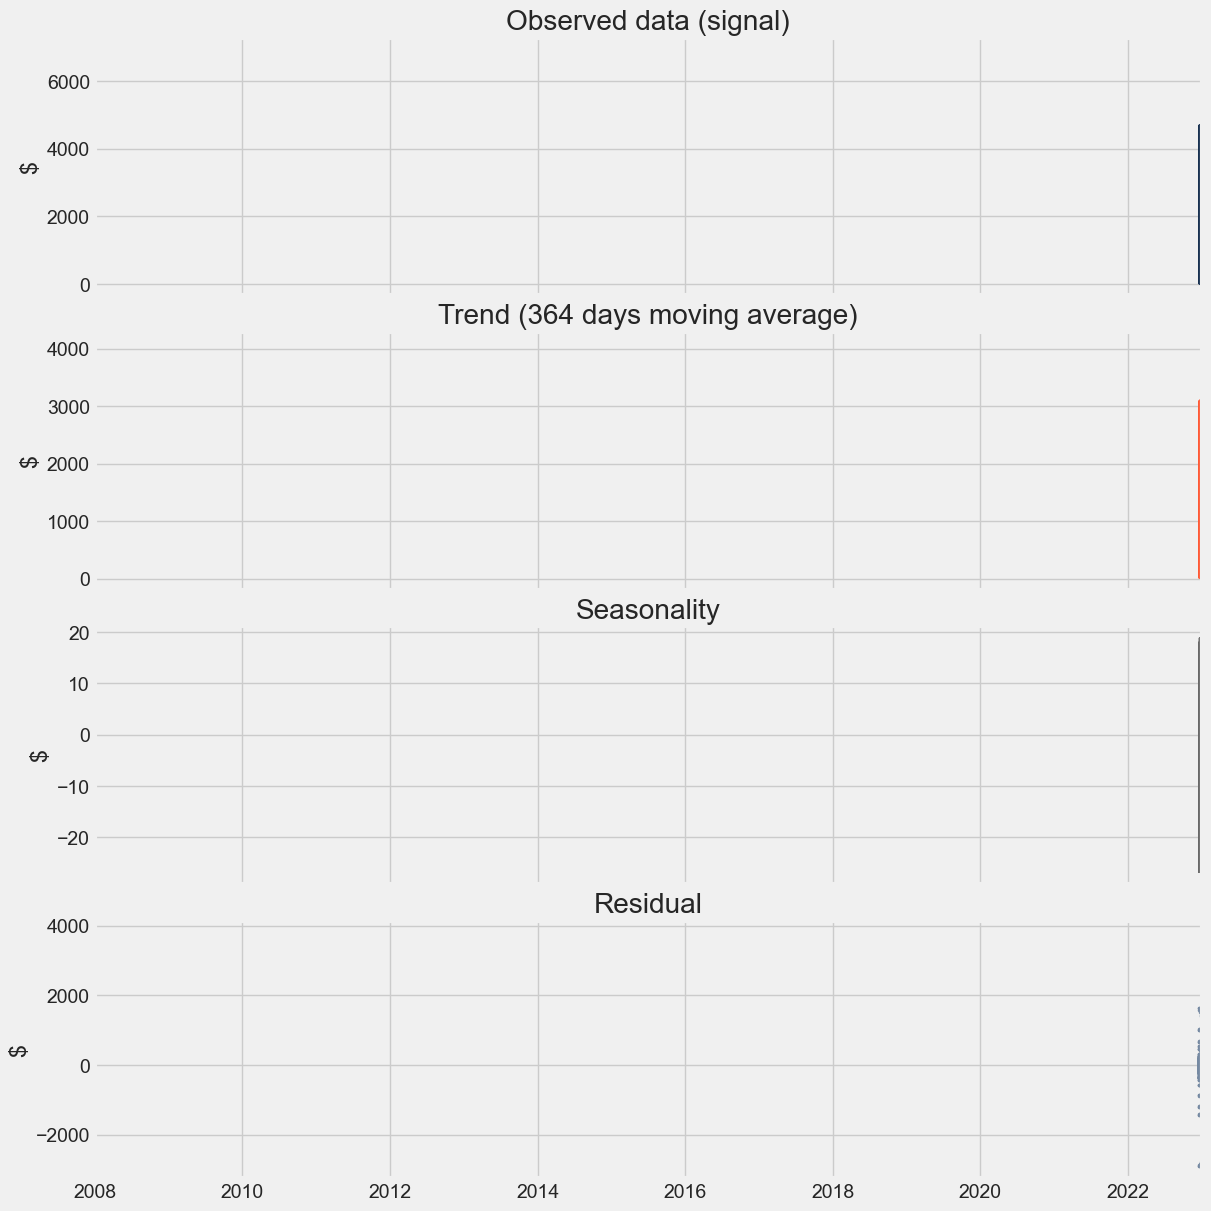

In [5]:
# We use the parameter `period` = 365 to extract the yearly seasonality. 
seas_decomp_yearly = seasonal_decompose(
    x=df['Close'], 
    model='additive', 
    two_sided=True,
    period= 365)

# Plots:
fig, ax = plt.subplots(4, 1, figsize=(12, 12), constrained_layout=True)

#Plot Signal
ax[0].set(title='Observed data (signal)', 
          ylabel="$")
seas_decomp_yearly.observed.plot(color=sns_c[0], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[0])
#Plot Trend
ax[1].set(title='Trend (364 days moving average)', 
          ylabel="$")
seas_decomp_yearly.trend.plot(color=sns_c[1], 
                              linewidth=1,
                              sharex=True,
                              ax=ax[1])
#Plot Seasonality
ax[2].set(title='Seasonality', 
          ylabel="$")
seas_decomp_yearly.seasonal.plot(
                                color=sns_c[2], 
                                linewidth=1,
                                sharex=True,
                                ax=ax[2])
#Plot residual
ax[3].set(title='Residual', 
          ylabel="$");
ax[3].scatter(
    x=seas_decomp_yearly.resid.index,
    y=seas_decomp_yearly.resid,
    color=sns_c[3],
    s=4)

for i in range(4):
    ax[i].set_xlim(pd.to_datetime("2008"),pd.to_datetime("2023"))
    
fig.savefig("../VRA.III.png",dpi=300)

NameError: name 'month_label_long' is not defined

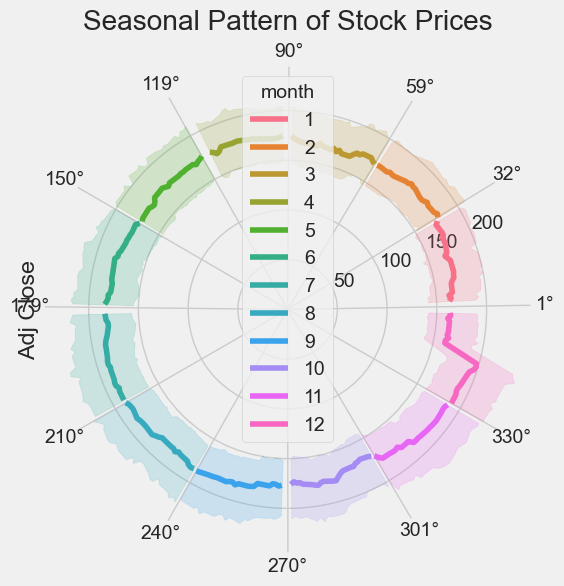

In [9]:
# Polar plot for seasonality 
ax = plt.subplot(111, projection='polar')

# Convert and plot data
df \
    .assign(day_of_year_cyclic=lambda x: 2 * np.pi * x.index.dayofyear / 365.25) \
    .pipe((sns.lineplot, 'data'), 
          x='day_of_year_cyclic', 
          y='Adj Close', 
          hue='month',
          palette=sns.color_palette("husl", 12),
          ax=ax)
          
# Make the plot more beautiful
days_per_month = [0] + [monthrange(2021, i)[1] for i in range(1, 13)]
month_start = np.cumsum(days_per_month) + 1
month_start_theta = [i * 2 * np.pi / 365.25 for i in month_start]

# Use the same number of tick locations and labels
ax.set_title('Seasonal Pattern of Stock Prices', va='bottom', pad=22)
ax.spines.clear()

ax.set_xlabel('')
ax.set_xticks(month_start_theta[:-1])  # Use all locations except the last one
ax.set_xticklabels(month_label_long)

ax.set_ylabel('')
ax.set_ylim(0, 200)
ax.set_yticks(yt := [0,50, 100, 150, 200])
ax.set_yticklabels([str(t) + '$' for t in yt], rotation=45)



# Arrows / Annotations
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="dimgrey")

# Update arrow positions based on your data range
arrow_pos1 = (1 * np.pi / 180, 1000)
arrow_pos2 = (25 * np.pi / 180, 1000)

a1 = patches.FancyArrowPatch(arrow_pos1, (1 * np.pi / 180, 2000), **kw)
a2 = patches.FancyArrowPatch(arrow_pos2, (25 * np.pi / 180, 2000), connectionstyle=f"arc3,rad={0.105}", **kw)

ax.add_patch(a1)
ax.add_patch(a2)


ax.set_rorigin(-5)
ax.xaxis.set_tick_params(which='major', pad=10)

ax.legend(labels=month_label, ncol=2, facecolor='white', edgecolor='white', bbox_to_anchor=(1.1, 1.1), loc=1)

ax.figure.set_figwidth(12)
ax.figure.set_figheight(12)

plt.show()

ax.savefig("../var_II.1.png",dpi=300)


In [16]:

# Get the list of tickers for the S&P 500

# Pulling the S&P 500 list from Wiki
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

# We want the symbols
sp500_tickers = tickers['Symbol'].tolist()

In [17]:
# Download historical data for each stock
stock_data = yf.download(sp500_tickers, start='2005-01-01', end='2023-01-01', progress=False)

# Extract the closing prices and create a new DataFrame
closing_prices = stock_data['Adj Close']

# Create a MultiIndex with dates and tickers
closing_prices.columns = pd.MultiIndex.from_product([closing_prices.columns, ['Close']])

# Display the resulting DataFrame
closing_prices.head()


4 Failed downloads:
['KVUE', 'VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1104555600, endDate = 1672549200")
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-01-01 -> 2023-01-01)')


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512981,NaN,0.958030,NaN,NaN,14.365738,4.233333,18.995514,30.838949,23.200205,...,35.891029,8.957225,26.668766,24.465839,NaN,11.864747,69.819260,55.509998,48.117657,NaN
2005-01-04 00:00:00,14.130107,NaN,0.967869,NaN,NaN,14.221060,4.177778,18.548903,30.024111,22.569033,...,35.814377,8.823019,26.487751,24.267971,NaN,11.707634,69.792885,54.470001,47.460762,NaN
2005-01-05 00:00:00,14.124030,NaN,0.976345,NaN,NaN,14.057920,4.153333,18.476862,29.859142,22.671034,...,36.219555,8.723600,26.349318,23.982157,NaN,11.679752,69.247513,52.570000,47.289394,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977103,NaN,NaN,14.374969,4.147778,18.311178,29.364239,22.632788,...,37.686966,8.708692,26.684732,24.096476,NaN,11.811528,70.047943,52.650002,47.560722,NaN
2005-01-07 00:00:00,13.801921,NaN,1.048247,NaN,NaN,14.621221,4.191111,19.168390,29.384233,22.664661,...,36.433094,8.658984,26.509048,23.911804,NaN,11.745639,69.924782,53.099998,46.404026,NaN


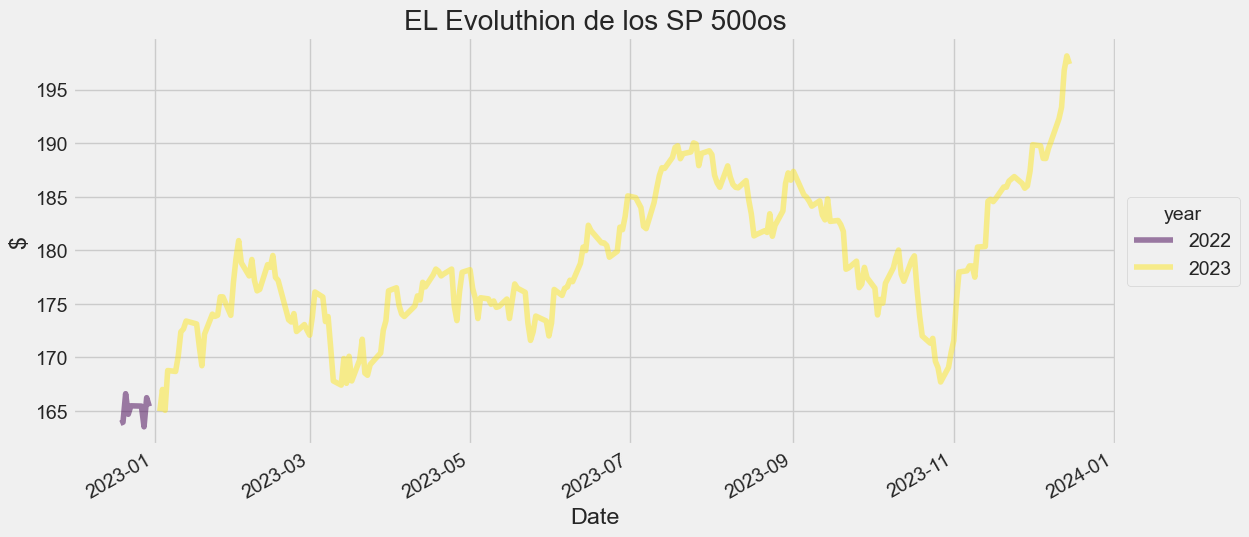

In [18]:
# Plot yearly seasonality
fig, ax = plt.subplots() 

pd.pivot_table(data=df[['year', 'dayofyear', 'Close']], index='Date', columns='year') \
    ['Close'] \
    .plot(cmap='viridis', alpha=0.5, ax=ax)

ax.legend(title='year', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='EL Evoluthion de los SP 500os', ylabel="$");

fig.savefig("../var_II.2.png",dpi=300)

In [19]:
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4531 entries, 2005-01-03 00:00:00 to 2022-12-30 00:00:00
Columns: 503 entries, ('A', 'Close') to ('ZTS', 'Close')
dtypes: float64(503)
memory usage: 17.4+ MB


In [20]:
closing_prices.describe()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
count,4531.000000,4346.000000,4531.000000,2518.000000,518.000000,4531.000000,4531.000000,4531.000000,4531.000000,4531.000000,...,4531.000000,4531.000000,4531.000000,4531.000000,2823.000000,4531.000000,4531.000000,4531.000000,4531.000000,2497.000000
mean,48.448794,24.411172,36.424995,67.152163,146.422568,43.033643,20.419887,99.804115,143.939038,57.838992,...,86.942125,29.423454,52.142977,40.256213,56.365921,50.791100,85.736241,118.573308,33.597528,89.944939
std,38.021691,15.226563,45.361764,32.997960,31.584883,32.539582,13.123476,88.428410,162.333301,44.493792,...,40.807460,19.175404,13.558789,11.521050,29.439899,33.773974,31.740740,134.141466,15.812926,56.585395
min,8.024001,1.659225,0.958030,21.519720,82.489998,11.856327,4.078889,15.465820,15.980000,10.995413,...,9.439812,8.338987,25.885143,19.614281,19.548441,11.458579,28.260178,16.450001,5.134858,26.500343
25%,22.003997,10.372515,5.530655,41.928810,116.712500,18.159925,7.894444,29.679867,33.549999,23.640967,...,56.660458,12.651337,41.584848,30.905016,31.396741,19.521843,58.178314,36.720001,20.024179,42.772053
50%,33.903698,21.469999,18.400402,61.513859,150.510002,31.388966,18.343332,66.755577,59.080002,39.247860,...,84.909943,21.677040,53.144989,37.733376,48.811935,42.830486,82.544571,51.700001,30.951422,71.059250
75%,64.691978,37.807460,41.923754,82.178446,169.985004,57.459475,30.340000,146.033821,238.320000,81.730255,...,112.810688,41.318056,59.671352,50.018383,75.770721,75.110069,110.596359,151.745003,47.290478,139.289032
max,176.669449,59.345566,179.953888,163.539825,216.839996,136.396820,63.619999,403.419495,688.369995,181.135361,...,211.408646,74.477821,110.410355,66.997948,134.216293,133.725113,170.146362,614.549988,68.870659,243.014008


In [21]:
closing_prices.columns

MultiIndex([(   'A', 'Close'),
            ( 'AAL', 'Close'),
            ('AAPL', 'Close'),
            ('ABBV', 'Close'),
            ('ABNB', 'Close'),
            ( 'ABT', 'Close'),
            ('ACGL', 'Close'),
            ( 'ACN', 'Close'),
            ('ADBE', 'Close'),
            ( 'ADI', 'Close'),
            ...
            ('WYNN', 'Close'),
            ( 'XEL', 'Close'),
            ( 'XOM', 'Close'),
            ('XRAY', 'Close'),
            ( 'XYL', 'Close'),
            ( 'YUM', 'Close'),
            ( 'ZBH', 'Close'),
            ('ZBRA', 'Close'),
            ('ZION', 'Close'),
            ( 'ZTS', 'Close')],
           length=503)

In [22]:
closing_prices.columns = closing_prices.columns.map(lambda x: x[0])

In [23]:
closing_prices.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03 00:00:00,14.512981,NaN,0.958030,NaN,NaN,14.365738,4.233333,18.995514,30.838949,23.200205,...,35.891029,8.957225,26.668766,24.465839,NaN,11.864747,69.819260,55.509998,48.117657,NaN
2005-01-04 00:00:00,14.130107,NaN,0.967869,NaN,NaN,14.221060,4.177778,18.548903,30.024111,22.569033,...,35.814377,8.823019,26.487751,24.267971,NaN,11.707634,69.792885,54.470001,47.460762,NaN
2005-01-05 00:00:00,14.124030,NaN,0.976345,NaN,NaN,14.057920,4.153333,18.476862,29.859142,22.671034,...,36.219555,8.723600,26.349318,23.982157,NaN,11.679752,69.247513,52.570000,47.289394,NaN
2005-01-06 00:00:00,13.814075,NaN,0.977103,NaN,NaN,14.374969,4.147778,18.311178,29.364239,22.632788,...,37.686966,8.708692,26.684732,24.096476,NaN,11.811528,70.047943,52.650002,47.560722,NaN
2005-01-07 00:00:00,13.801921,NaN,1.048247,NaN,NaN,14.621221,4.191111,19.168390,29.384233,22.664661,...,36.433094,8.658984,26.509048,23.911804,NaN,11.745639,69.924782,53.099998,46.404026,NaN


In [24]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [25]:
column_names_list = list(closing_prices.columns)

In [26]:
column_names_list 

['A',
 'AAL',
 'AAPL',
 'ABBV',
 'ABNB',
 'ABT',
 'ACGL',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'AEE',
 'AEP',
 'AES',
 'AFL',
 'AIG',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALL',
 'ALLE',
 'AMAT',
 'AMCR',
 'AMD',
 'AME',
 'AMGN',
 'AMP',
 'AMT',
 'AMZN',
 'ANET',
 'ANSS',
 'AON',
 'AOS',
 'APA',
 'APD',
 'APH',
 'APTV',
 'ARE',
 'ATO',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXON',
 'AXP',
 'AZO',
 'BA',
 'BAC',
 'BALL',
 'BAX',
 'BBWI',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BG',
 'BIIB',
 'BIO',
 'BK',
 'BKNG',
 'BKR',
 'BLDR',
 'BLK',
 'BMY',
 'BR',
 'BRK.B',
 'BRO',
 'BSX',
 'BWA',
 'BX',
 'BXP',
 'C',
 'CAG',
 'CAH',
 'CARR',
 'CAT',
 'CB',
 'CBOE',
 'CBRE',
 'CCI',
 'CCL',
 'CDAY',
 'CDNS',
 'CDW',
 'CE',
 'CEG',
 'CF',
 'CFG',
 'CHD',
 'CHRW',
 'CHTR',
 'CI',
 'CINF',
 'CL',
 'CLX',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COO',
 'COP',
 'COR',
 'COST',
 'CPB',
 'CPRT',
 'CPT',
 'CRL',
 'CRM',
 'CSCO',
 'CSGP',
 'CSX',
 'CTAS',
 'CTL

In [27]:
closing_prices.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'WYNN', 'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION',
       'ZTS'],
      dtype='object', length=503)

In [28]:
scaler = StandardScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [29]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
# results = model.fit()

# Get the lag order
# lag_order = results.k_ar

## Make predictions
# predictions = results.forecast(closing_prices.values[-lag_order:], steps=your_steps)

# # Create a DataFrame with the predicted values
# predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
# forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=10)

# # Set the index of the predictions DataFrame
# predictions_df.index = forecast_dates

# # Display the predictions DataFrame
# print(predictions_df)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [30]:
closing_prices.isna().sum().sum()

188677

In [31]:
closing_prices.interpolate(axis=1, method='linear', inplace=True)

C:\Users\chris\AppData\Local\Temp\ipykernel_29912\1342120467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_prices.interpolate(axis=1, method='linear', inplace=True)


In [32]:
closing_prices.isna().sum().sum()

0

In [33]:
# Assuming closing_prices is your DataFrame with stock prices
model = VAR(closing_prices)
results = model.fit()

# Get the lag order
lag_order = results.k_ar

## Make predictions
predictions = results.forecast(closing_prices.values[-lag_order:], steps=30)

# # Create a DataFrame with the predicted values
predictions_df = pd.DataFrame(predictions, columns=closing_prices.columns)

# # Generate a date range for the forecast period
forecast_dates = pd.date_range(start=closing_prices.index[-1] + pd.Timedelta(days=1), periods=30)

# # Set the index of the predictions DataFrame
predictions_df.index = forecast_dates

# # Display the predictions DataFrame
print(predictions_df)

C:\Users\chris\Documents\1_spicy\000_datadrivendollars\ds-capstone\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       A           AAL          AAPL          ABBV  \
2022-12-31  1.473668e+02  1.232869e+01  1.275617e+02  1.550273e+02   
2023-01-01 -1.379922e+03  3.817995e+04 -2.403717e+03  3.968228e+04   
2023-01-02  2.247338e+04 -7.289309e+03  1.534838e+04 -7.595173e+02   
2023-01-03  1.107773e+06 -2.757930e+07  1.830147e+06 -2.856367e+07   
2023-01-04 -1.607060e+07  3.645734e+06 -1.089654e+07 -1.030535e+06   
2023-01-05 -9.699791e+07  2.318663e+09 -1.554940e+08  2.402504e+09   
2023-01-06  1.872036e+09 -1.329687e+10  1.780685e+09 -1.336440e+10   
2023-01-07  3.129325e+10 -9.608850e+11  5.884275e+10 -9.974775e+11   
2023-01-08 -8.411353e+11  7.082527e+12 -8.423998e+11  7.167565e+12   
2023-01-09 -9.095330e+12  3.241044e+14 -1.886201e+13  3.369051e+14   
2023-01-10  4.783071e+14 -7.239172e+15  6.060265e+14 -7.440666e+15   
2023-01-11  5.741491e+14 -1.169836e+17  4.997072e+15 -1.224192e+17   
2023-01-12 -2.562848e+17  4.677259e+18 -3.561382e+17  4.823626e+18   
2023-01-13  4.903760

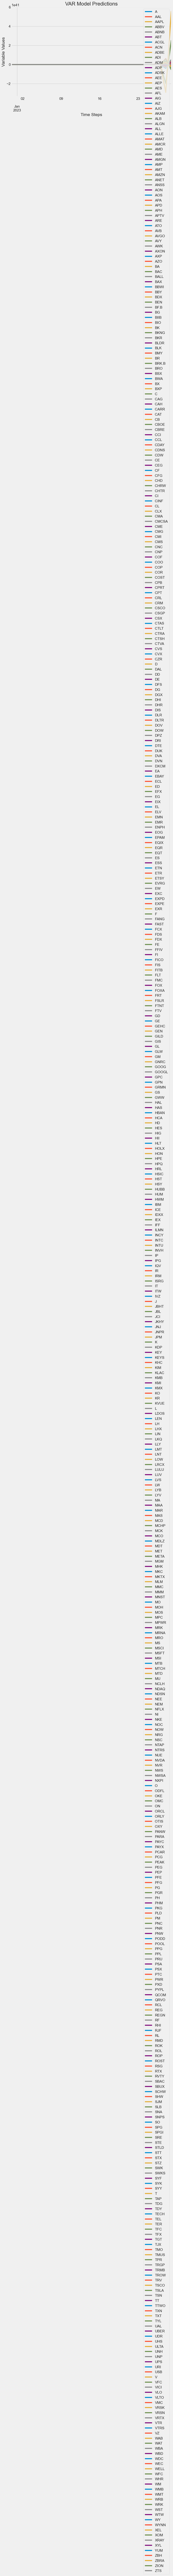

In [34]:
import matplotlib.pyplot as plt

# Assuming predictions_df is your DataFrame with predictions
predictions_df.plot(figsize=(10, 6))
plt.title('VAR Model Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Variable Values')
plt.legend(loc='upper right')
plt.show()